In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [33]:
log = json.load(open("log_panda_nop.json", "r"))
null = json.load(open("log_null.json", "r"))

In [34]:
def visualize(name, title, label):
    plt.grid()
    for i in range(len(log[name][0])):
        data = np.array(log[name]) #- np.array(null[name])
        plt.plot(log["time"], data[:,i],
                 label=f"{label} [{i}]")

    plt.legend(loc=(1.05, 0.))
    plt.xlabel("Time [s]")
    plt.title(title)
    plt.savefig(f"{name}.png", dpi=300)

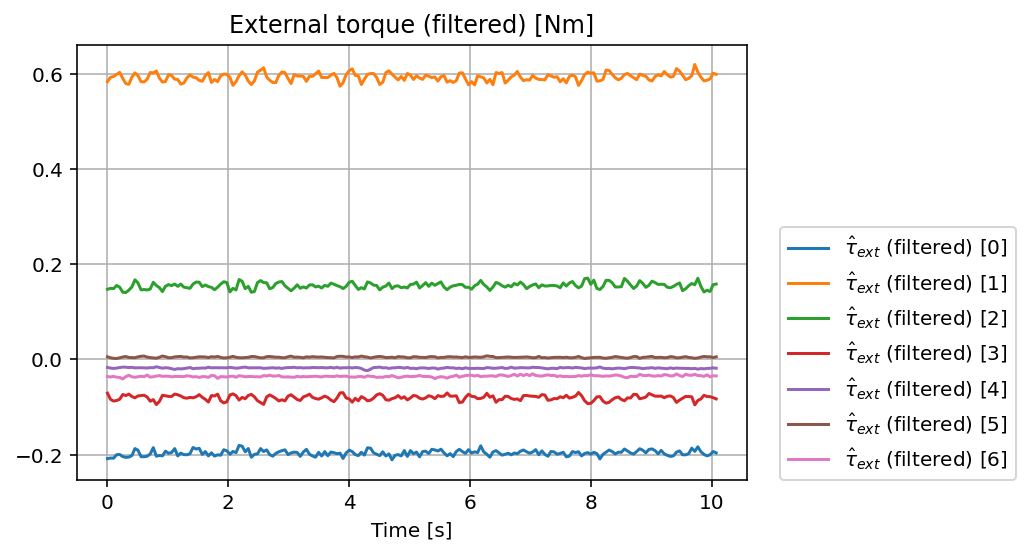

In [35]:
visualize("tau_ext_hat_filtered",
          "External torque (filtered) [Nm]",
          "$\\hat{\\tau}_{ext}$ (filtered)")

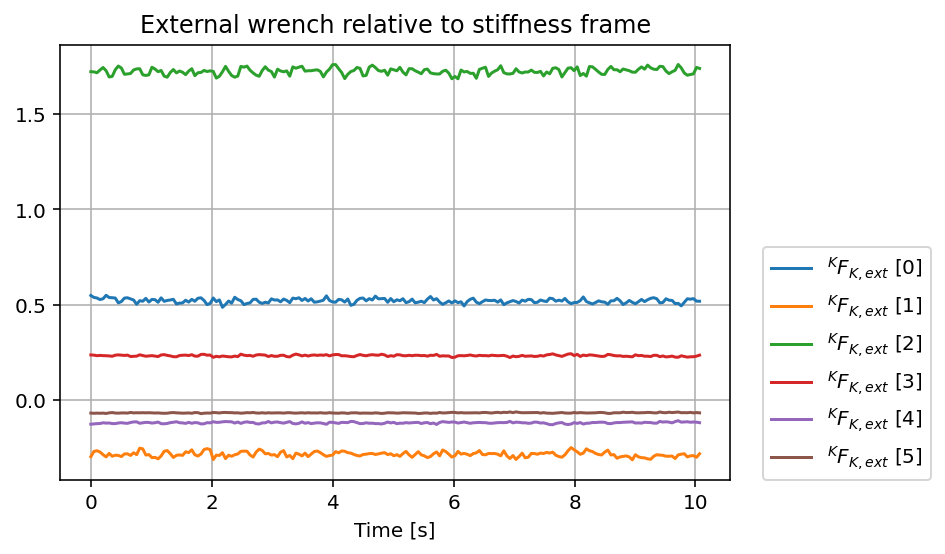

In [36]:
visualize("K_F_ext_hat_K",
          "External wrench relative to stiffness frame",
          "$^{K}F_{K,ext}$")

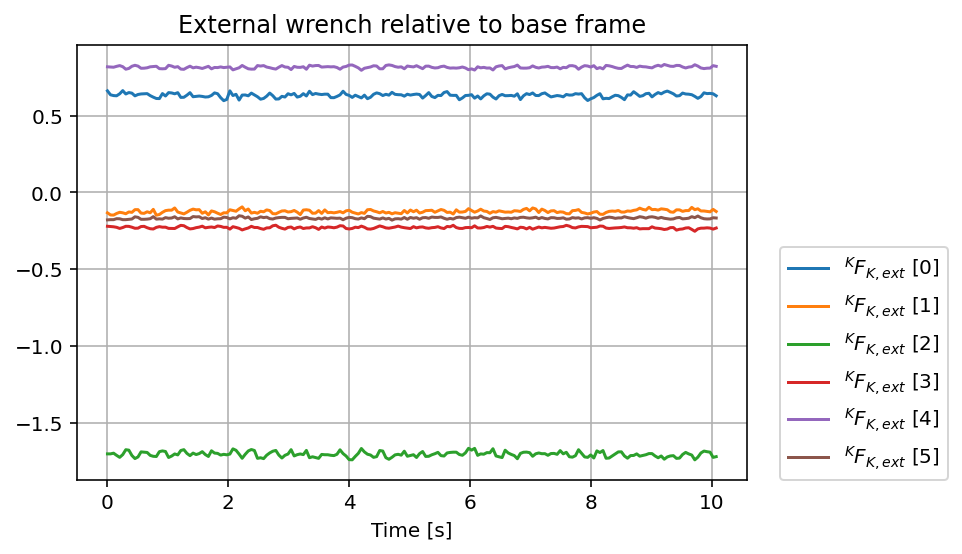

In [37]:
visualize("O_F_ext_hat_K",
          "External wrench relative to base frame",
          "$^{K}F_{K,ext}$")